In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Overview

In [64]:
ast = pd.read_csv("../Resources/account_state_transitions.csv")
ast = ast.iloc[:,2:6]

In [65]:
# Sort by account_id and date
ast = ast.sort_values(['account_id','started_when'])

# Reset index
ast = ast.reset_index(drop=True)

In [66]:
# Group by account_id, find most recent date and corresponding state
ast_grouped = ast.groupby('account_id',as_index=False).agg({
    'started_when':'max',
    'to_state':'last'
})

In [67]:
# Current state of each account_id
ast_grouped

,account_id,started_when,to_state
0,1,2020-01-17 13:01:20.571392,DISABLED
1,2,2020-02-24 02:00:21.571392,UNLOCKED
2,3,2020-03-17 22:22:55.571392,DISABLED
3,4,2020-02-25 04:28:59.571392,UNLOCKED
4,5,2020-03-12 01:00:17.571392,DISABLED
5,6,2020-02-20 18:54:47.571392,UNLOCKED
6,7,2020-03-11 18:35:25.571392,DISABLED
7,8,2020-03-16 10:07:43.255603,DISABLED
8,9,2020-03-04 07:45:50.571392,UNLOCKED
9,10,2020-02-21 15:48:49.571392,UNLOCKED


In [68]:
# Number of accounts in each state
account_overview = ast_grouped['to_state'].value_counts()
account_overview_df = pd.DataFrame(account_overview).reset_index()

In [69]:
account_overview_df = account_overview_df.rename(columns={'index':'status','to_state':'number_of_accounts'})

In [70]:
account_overview_df.iloc[0,0] = 'ONGOING'

In [71]:
account_overview_df

,status,number_of_accounts
0,ONGOING,473
1,UNLOCKED,292
2,WRITTEN_OFF,7


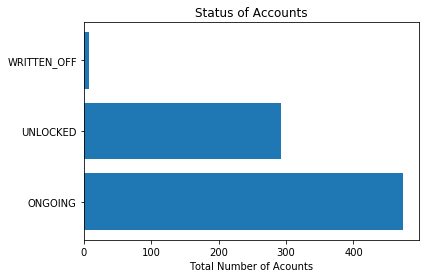

In [73]:
y = account_overview_df['status']
width = account_overview_df['number_of_accounts']

plt.barh(y,width)
plt.title("Status of Accounts")
plt.xlabel("Total Number of Acounts")
plt.show()

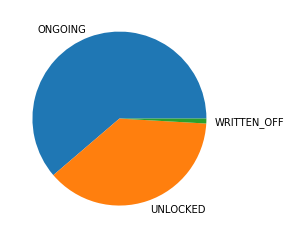

In [74]:
plt.pie(account_overview_df['number_of_accounts'],labels=account_overview_df['status'])
plt.show()